# Complex Network Analysis - Parts 1 & 2
## Master in BigData: SNA Lab - Exercises (SOLUTIONS)

This notebook contains exercises on complex network analysis and graph modeling using NetworkX.

**Prerequisites:**
- `facebook.ncol` file should be available in the working directory
- All required libraries should be installed

In [1]:
# Import required libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib to display plots inline
%matplotlib inline

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


# Part 1: Reading graphs from files / writing graphs to files + graph basics

## Exercise 1: Graph Reading and Types
Load the Facebook dataset as both undirected and directed graphs. Compare the number of edges in each case and explain why they differ.

In [ ]:
# Load Facebook dataset as undirected and directed
fg_undirected = nx.read_weighted_edgelist("facebook.ncol")
fg_directed = nx.read_weighted_edgelist("facebook.ncol", create_using=nx.DiGraph)

print(f"Undirected graph - Nodes: {fg_undirected.number_of_nodes()}, Edges: {fg_undirected.number_of_edges()}")
print(f"Directed graph - Nodes: {fg_directed.number_of_nodes()}, Edges: {fg_directed.number_of_edges()}")
print("\nExplanation: Directed graph has more edges because each undirected edge becomes two directed edges")



Undirected graph - Nodes: 45813, Edges: 183412
Directed graph - Nodes: 45813, Edges: 264004

Explanation: Directed graph has more edges because each undirected edge becomes two directed edges


Create a small test graph with 5 nodes and save it in three different formats: .ncol, .pajek, and .gml. Load each format back and verify they contain the same information.
Hint: you can use <code>nx.is_isomorphic(g1, g2)</code> to che if two graphs are identical

In [ ]:
# Create test graph and save in different formats
G_test = nx.Graph()
G_test.add_weighted_edges_from([('A', 'B', 1.5), ('B', 'C', 2.0), 
                                ('C', 'D', 0.5), ('D', 'E', 3.0), ('E', 'A', 1.0)])

# Save in different formats
nx.write_weighted_edgelist(G_test, "test_graph.ncol")
nx.write_pajek(G_test, "test_graph.pajek")
nx.write_gml(G_test, "test_graph.gml")

print("Test graph saved in multiple formats:")
print("- test_graph.ncol (edge list format)")
print("- test_graph.pajek (Pajek format)")
print("- test_graph.gml (Graph Markup Language)")

# Verify by reading back
G_test_loaded = nx.read_weighted_edgelist("test_graph.ncol")
print(f"\nOriginal edges: {list(G_test.edges(data=True))}")
print(f"Loaded edges: {list(G_test_loaded.edges(data=True))}")
print(f"Graphs are identical: {nx.is_isomorphic(G_test, G_test_loaded)}")

Test graph saved in multiple formats:
- test_graph.ncol (edge list format)
- test_graph.pajek (Pajek format)
- test_graph.gml (Graph Markup Language)

Original edges: [('A', 'B', {'weight': 1.5}), ('A', 'E', {'weight': 1.0}), ('B', 'C', {'weight': 2.0}), ('C', 'D', {'weight': 0.5}), ('D', 'E', {'weight': 3.0})]
Loaded edges: [('A', 'B', {'weight': 1.5}), ('A', 'E', {'weight': 1.0}), ('B', 'C', {'weight': 2.0}), ('E', 'D', {'weight': 3.0}), ('C', 'D', {'weight': 0.5})]
Graphs are identical: True


## Exercise 2: Graph Properties Exploration
For the Facebook graph, calculate and compare the number of nodes and edges in both directed and undirected versions. Find the node with the highest in-degree and out-degree.

In [4]:
fg_undirected = nx.read_weighted_edgelist("facebook.ncol")
fg_directed = nx.read_weighted_edgelist("facebook.ncol", create_using=nx.DiGraph)

print("=== Graph Properties Comparison ===")
print(f"Facebook undirected - Nodes: {fg_undirected.number_of_nodes()}, Edges: {fg_undirected.number_of_edges()}")
print(f"Facebook directed - Nodes: {fg_directed.number_of_nodes()}, Edges: {fg_directed.number_of_edges()}")

=== Graph Properties Comparison ===
Facebook undirected - Nodes: 45813, Edges: 183412
Facebook directed - Nodes: 45813, Edges: 264004


In [5]:
# Find highest in-degree and aout-degree nodes
in_degrees = dict(fg_directed.in_degree())
out_degrees = dict(fg_directed.out_degree())

max_in_node = max(in_degrees, key=in_degrees.get)
max_out_node = max(out_degrees, key=out_degrees.get)

print(f"\nHighest in-degree node: {max_in_node} (degree: {in_degrees[max_in_node]})")
print(f"Highest out-degree node: {max_out_node} (degree: {out_degrees[max_out_node]})")
print(f"Same node? {max_in_node == max_out_node}")

# Additional statistics
print(f"\nAverage in-degree: {np.mean(list(in_degrees.values())):.2f}")
print(f"Average out-degree: {np.mean(list(out_degrees.values())):.2f}")


Highest in-degree node: 2420 (degree: 199)
Highest out-degree node: 6765 (degree: 157)
Same node? False

Average in-degree: 5.76
Average out-degree: 5.76


## Exercise 3: Node and Edge Manipulation
Extract all neighbors of node "872" from the undirected Facebook graph. How many neighbors does it have?

In [ ]:
node = '872'  # Example node from the dataset
neighs_872 = list(fg_undirected.neighbors(node))
print(f"Node 872 has {len(neighs_872)} neighbors.")

Node 872 has 12 neighbors.


List all outgoing edges from node "872" in the directed Facebook graph and all incoming edges to the same node.

In [7]:
# Outgoing and incoming edges for a node
out_edges = list(fg_directed.out_edges(node))
in_edges = list(fg_directed.in_edges(node))
print(f"\nNode {node}:")
print(f"  Outgoing edges: {len(out_edges)}")
print(f"  Incoming edges: {len(in_edges)}")

print("\nOutgoing edges:")
for u, v in out_edges:
    print(f"  {u} -> {v}")
print("\nIncoming edges:")
for u, v in in_edges:
    print(f"  {u} <- {v}")


Node 872:
  Outgoing edges: 11
  Incoming edges: 7

Outgoing edges:
  872 -> 873
  872 -> 2290
  872 -> 2712
  872 -> 4197
  872 -> 9207
  872 -> 10501
  872 -> 10609
  872 -> 18086
  872 -> 31428
  872 -> 36892
  872 -> 37757

Incoming edges:
  2 <- 872
  873 <- 872
  9207 <- 872
  10609 <- 872
  18086 <- 872
  31428 <- 872
  36892 <- 872



Write a function that checks if there exists a bidirectional connection between nodes "n1" and "n2". The function returns True if there is an edge from n1 to n2 and from n2 to n1. It returns False otherwise. Test it on the directed facebook graph.
- 2 <-> 3: True
- 872 <-> 3: False

In [8]:
def has_bidirectional_edge(n1, n2):
    """Check if there is a bidirectional edge between n1 and n2."""
    return fg_directed.has_edge(n1, n2) and fg_directed.has_edge(n2, n1)

# test on 2, 3
print(f"\nBidirectional edge between 2 and 3: {has_bidirectional_edge('2', '3')}")
# test on 872, 3
print(f"Bidirectional edge between 872 and 3: {has_bidirectional_edge('872', '3')}")


Bidirectional edge between 2 and 3: True
Bidirectional edge between 872 and 3: False


## Exercise 4: Edge Weights Analysis
Extract edges with their weights from the directed Facebook graph. What is the range of weights?

In [9]:
edges = list(fg_directed.edges())
print(f"\nTotal edges in directed graph: {len(edges)}")

min_weight = min(fg_directed[u][v]['weight'] for u, v in edges)
max_weight = max(fg_directed[u][v]['weight'] for u, v in edges)
print(f"Minimum edge weight: {min_weight}")
print(f"Maximum edge weight: {max_weight}")


Total edges in directed graph: 264004
Minimum edge weight: 1.0
Maximum edge weight: 742.0


Find all edges with weight greater than 5. How many such edges exist? Compute the ratio over the total number of edges.

In [10]:
# all edges with weight > 5
wm5 = []
for u, v, d in fg_directed.edges(data=True):
    if d['weight'] > 5:
        wm5.append((u, v, d['weight']))
print(f"\nEdges with weight > 5: {len(wm5)}")
ratio = len(wm5) / len(edges)
print(f"Ratio of edges with weight > 5: {ratio:.2%}")


Edges with weight > 5: 30574
Ratio of edges with weight > 5: 11.58%


Create a histogram to show the edge weight distribution.

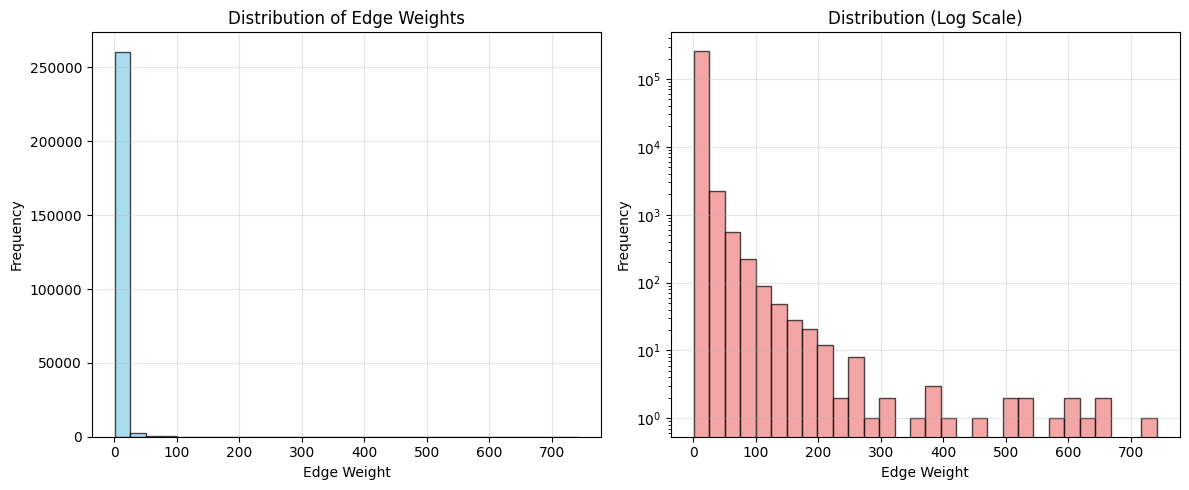


Weight statistics:
Mean: 3.24
Median: 1.00
Std: 8.24


In [11]:
all_weights = [data.get('weight', 1) for _, _, data in fg_directed.edges(data=True)]

# Create histogram
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(all_weights, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Edge Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Edge Weights')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(all_weights, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel('Edge Weight')
plt.ylabel('Frequency')
plt.title('Distribution (Log Scale)')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nWeight statistics:")
print(f"Mean: {np.mean(all_weights):.2f}")
print(f"Median: {np.median(all_weights):.2f}")
print(f"Std: {np.std(all_weights):.2f}")

## Exercise 5: Directed vs Undirected Comparison
Create a toy directed graph and observe the behavior when converting to undirected.

In [12]:
# Create toy directed graph with bidirectional edges having different weights
G_toy = nx.DiGraph()
G_toy.add_weighted_edges_from([
    ('A', 'B', 1.0), 
    ('B', 'A', 2.0), 
    ('B', 'C', 3.0),
    ('C', 'D', 4.0),
    ('D', 'A', 5.0)
])

print("Original directed toy graph edges:")
for edge in G_toy.edges(data=True):
    print(f"  {edge[0]} -> {edge[1]}: weight = {edge[2]['weight']}")

Original directed toy graph edges:
  A -> B: weight = 1.0
  B -> A: weight = 2.0
  B -> C: weight = 3.0
  C -> D: weight = 4.0
  D -> A: weight = 5.0



Converted to undirected:
  A -- B: weight = 2.0
  A -- D: weight = 5.0
  B -- C: weight = 3.0
  C -- D: weight = 4.0

Observation: The last edge weight is retained when converting to undirected
For A-B edge pair: A->B (weight=1.0) and B->A (weight=2.0)
Resulting undirected edge weight: 2.0


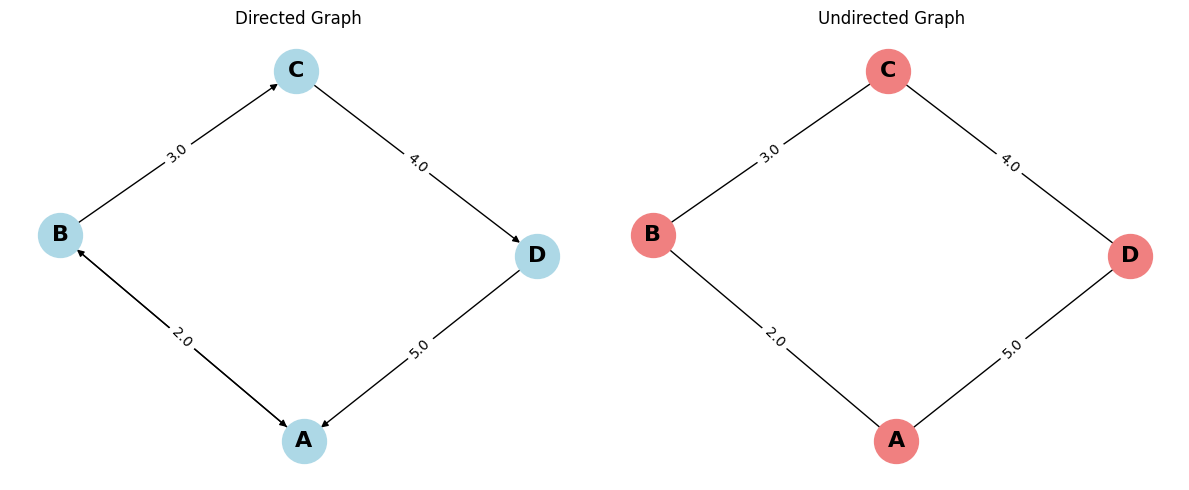

In [13]:
# Convert to undirected
G_toy_undirected = G_toy.to_undirected()

print("\nConverted to undirected:")
for edge in G_toy_undirected.edges(data=True):
    print(f"  {edge[0]} -- {edge[1]}: weight = {edge[2]['weight']}")

print("\nObservation: The last edge weight is retained when converting to undirected")
print("For A-B edge pair: A->B (weight=1.0) and B->A (weight=2.0)")
print(f"Resulting undirected edge weight: {G_toy_undirected['A']['B']['weight']}")

# Visualize the difference
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
pos = nx.spring_layout(G_toy, seed=42)
nx.draw(G_toy, pos, with_labels=True, node_color='lightblue', 
        node_size=1000, font_size=16, font_weight='bold', arrows=True)
edge_labels = nx.get_edge_attributes(G_toy, 'weight')
nx.draw_networkx_edge_labels(G_toy, pos, edge_labels)
plt.title('Directed Graph')

plt.subplot(1, 2, 2)
nx.draw(G_toy_undirected, pos, with_labels=True, node_color='lightcoral', 
        node_size=1000, font_size=16, font_weight='bold')
edge_labels_undirected = nx.get_edge_attributes(G_toy_undirected, 'weight')
nx.draw_networkx_edge_labels(G_toy_undirected, pos, edge_labels_undirected)
plt.title('Undirected Graph')

plt.tight_layout()
plt.show()

# Part 2: Connected components, Giant Component & Subgraphs

## Exercise 6: 
For the Facebook graph, calculate the number of weakly connected components and strongly connected components. Why is there such a difference?

In [14]:
# Analyze Facebook graph connectivity
print(f"\nFacebook graph connectivity:")
print(f"  Weakly connected components: {nx.number_weakly_connected_components(fg_directed)}")
print(f"  Strongly connected components: {nx.number_strongly_connected_components(fg_directed)}")
print("\nExplanation: Difference exists because strong connectivity requires bidirectional paths,")
print("while weak connectivity only requires undirected paths.")


Facebook graph connectivity:
  Weakly connected components: 842
  Strongly connected components: 14003

Explanation: Difference exists because strong connectivity requires bidirectional paths,
while weak connectivity only requires undirected paths.


## Exercise 7: Connected Components Exploration
Find all weakly connected components in the Facebook graph and list the sizes of the 10 largest components.

In [15]:
# Find weakly connected components
fb_weak_components = list(nx.weakly_connected_components(fg_directed))
component_sizes = sorted([len(comp) for comp in fb_weak_components], reverse=True)

print(f"Total number of weakly connected components: {len(fb_weak_components)}")
print(f"Sizes of 10 largest components: {component_sizes[:10]}")


Total number of weakly connected components: 842
Sizes of 10 largest components: [43953, 6, 5, 5, 5, 5, 5, 5, 5, 4]


Calculate what percentage of nodes belongs to the Giant Component of the Facebook graph.

In [16]:
# Calculate Giant Component percentage
giant_component_size = max(component_sizes)
total_nodes = fg_directed.number_of_nodes()
gc_percentage = (giant_component_size / total_nodes) * 100

print(f"\nGiant Component Analysis:")
print(f"  Size: {giant_component_size} nodes")
print(f"  Total nodes in graph: {total_nodes}")
print(f"  Percentage of total nodes: {gc_percentage:.2f}%")




Giant Component Analysis:
  Size: 43953 nodes
  Total nodes in graph: 45813
  Percentage of total nodes: 95.94%


## Exercise 8: Subgraph analysis
Create three different subgraphs of the Facebook Giant Component:

- Nodes with degree > 150
- Nodes with degree between 51-150
- Nodes with degree < 50


Compare the number of connected components in each subgraph and explain the pattern.

In [ ]:
giant_comp = max(nx.weakly_connected_components(fg_directed), key=len)
fb_gc = fg_directed.subgraph(giant_comp)

# Subgraph 1: Nodes with degree > 150
nodes_gt_150 = [n for n in fb_gc.nodes() if fb_gc.degree(n) > 150]
subgraph_gt_150 = fb_gc.subgraph(nodes_gt_150)
components_gt_150 = list(nx.weakly_connected_components(subgraph_gt_150))
num_components_gt_150 = len(components_gt_150)

# Subgraph 2: Nodes with degree between 50 and 150
nodes_50_150 = [n for n in fb_gc.nodes() if 50 < fb_gc.degree(n) <= 150]
subgraph_50_150 = fb_gc.subgraph(nodes_50_150)
components_50_150 = list(nx.weakly_connected_components(subgraph_50_150))
num_components_50_150 = len(components_50_150)

# Subgraph 3: Nodes with degree < 50
nodes_lt_50 = [n for n in fb_gc.nodes() if fb_gc.degree(n) < 50]
subgraph_lt_50 = fb_gc.subgraph(nodes_lt_50)
components_lt_50 = list(nx.weakly_connected_components(subgraph_lt_50))
num_components_lt_50 = len(components_lt_50)

print("=== Subgraph Connected Components Comparison ===")
print(f"Nodes with degree > 150: {len(nodes_gt_150)} nodes, {num_components_gt_150} components")
print(f"Nodes with degree 51-150: {len(nodes_50_150)} nodes, {num_components_50_150} components")
print(f"Nodes with degree < 50: {len(nodes_lt_50)} nodes, {num_components_lt_50} components")


=== Subgraph Connected Components Comparison ===
Nodes with degree > 150: 43 nodes, 7 components
Nodes with degree 51-150: 1607 nodes, 12 components
Nodes with degree < 50: 42230 nodes, 1173 components


Pattern Explanation:
- High-degree nodes (>150) are few and do not manage to stay connected.
- Medium-degree nodes (51-150) are more numerous and may form larger, but still fragmented, components.
- Low-degree nodes (<50) are the most numerous and highly fragmented, resulting in many small isolated components.

Removing low-degree nodes breaks bridges, while high-degree nodes alone are not enough to keep the network connected.

# Exercise 9: Random Failures vs. Targeted Attacks
Load the karate club graph via <code>nx.karate_club_graph()</code>. It consists of one component with 34 nodes and 78 edges.
Pick 5 random nodes and remove them. Compute the number of connected components.

In [18]:
karate = nx.karate_club_graph()
N = karate.number_of_nodes()
print(f"\nKarate Club Graph - Nodes: {N}, Edges: {karate.number_of_edges()}")

# Remove 5 random nodes and compute number of connected components
nodes_to_remove = random.sample(list(karate.nodes()), 5)
karate_removed = karate.copy()
karate_removed.remove_nodes_from(nodes_to_remove)

num_components = nx.number_connected_components(karate_removed)
print(f"Removed nodes: {nodes_to_remove}")
print(f"Number of connected components after removal: {num_components}")


Karate Club Graph - Nodes: 34, Edges: 78
Removed nodes: [7, 1, 17, 15, 14]
Number of connected components after removal: 1


Reload the complete karate club graph. Now, remove the 5 highest degree nodes. What happens?

In [19]:
karate_targeted = nx.karate_club_graph()
# Sort nodes by degree (descending)
high_degree_nodes = sorted(karate_targeted.degree(), key=lambda x: x[1], reverse=True)
top5_nodes = [n for n, d in high_degree_nodes[:5]]
karate_targeted.remove_nodes_from(top5_nodes)
num_components_targeted = nx.number_connected_components(karate_targeted)

print(f"\nTargeted Removal:")
print(f"Removed nodes: {top5_nodes}")
print(f"Number of connected components after removal: {num_components_targeted}")



Targeted Removal:
Removed nodes: [33, 0, 32, 2, 1]
Number of connected components after removal: 14
